<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

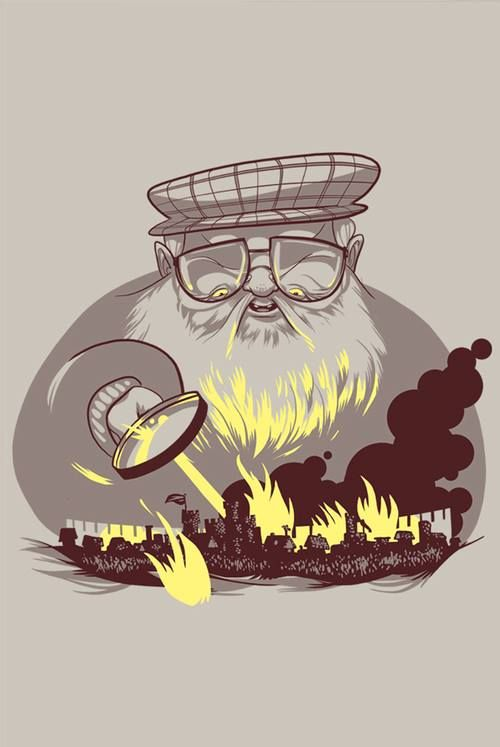

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [347]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 65.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 80.5MB/s]


In [348]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [349]:
!cp /content/game_of_thrones_train.csv /content/drive/MyDrive/

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.preprocessing
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [351]:
data = pd.read_csv('drive/MyDrive/game_of_thrones_train.csv', index_col='S.No')
test_fin = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
df = pd.DataFrame(data)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [352]:
mean_age = np.mean(df["age"].dropna().values)
df.age.replace(np.nan, mean_age, inplace=True)
df.title.replace(np.nan, "Untitled", inplace=True)
df.house.replace(np.nan, "No House", inplace=True)
df.culture.replace(np.nan, "No Culture", inplace=True)

test_fin.age.replace(np.nan, mean_age, inplace=True)
test_fin.title.replace(np.nan, "Untitled", inplace=True)
test_fin.house.replace(np.nan, "No House", inplace=True)
test_fin.culture.replace(np.nan, "No Culture", inplace=True)

<ipython-input-352-b3b936d133ed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.replace(np.nan, mean_age, inplace=True)
<ipython-input-352-b3b936d133ed>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [353]:
df["isPopular"] = (df.popularity > 0.5).astype(int)
df["boolDeadRelations"] = (df.numDeadRelations > 0).astype(int)

test_fin["isPopular"] = (test_fin.popularity > 0.5).astype(int)
test_fin["boolDeadRelations"] = (test_fin.numDeadRelations > 0).astype(int)

In [354]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
for k, v in cult.items():
    df["culture"]=df.culture.str.lower().replace(v, k)
    test_fin["culture"]=test_fin.culture.str.lower().replace(v, k)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [355]:
columns=["name", "dateOfBirth", "mother", "father", "heir", "spouse", "numDeadRelations", "popularity", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"]
df.drop(columns=columns, inplace = True)
data.drop(columns=columns, inplace = True)
test_fin.drop(columns=columns, inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

isAlive
1    1212
0     345
Name: count, dtype: int64


<Axes: >

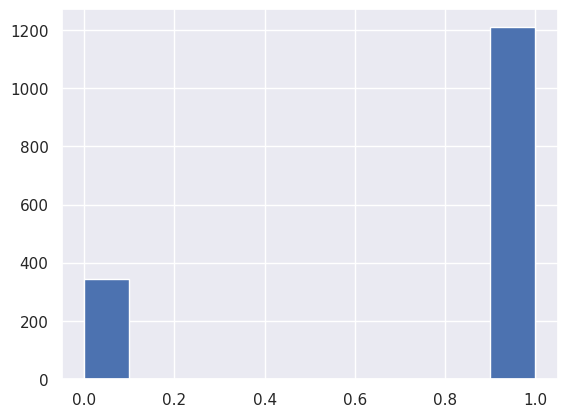

In [356]:
print(df["isAlive"].value_counts())
df.isAlive.hist()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [357]:
categorial_columns=["title", "culture", "house"]
unprocessed_cat_columns=categorial_columns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in unprocessed_cat_columns:
  labels = label_encoder.fit_transform(pd.concat([df, test_fin])[column])
  df[column] = labels[0:len(df[column])]
  test_fin[column] = labels[-len(test_fin[column]):]

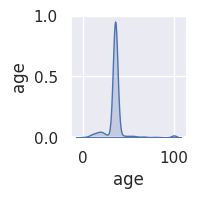

In [358]:
numerical_columns = ["age"]
sns.set()
sns.pairplot(df[numerical_columns], height=2, kind='scatter', diag_kind='kde')

<Axes: >

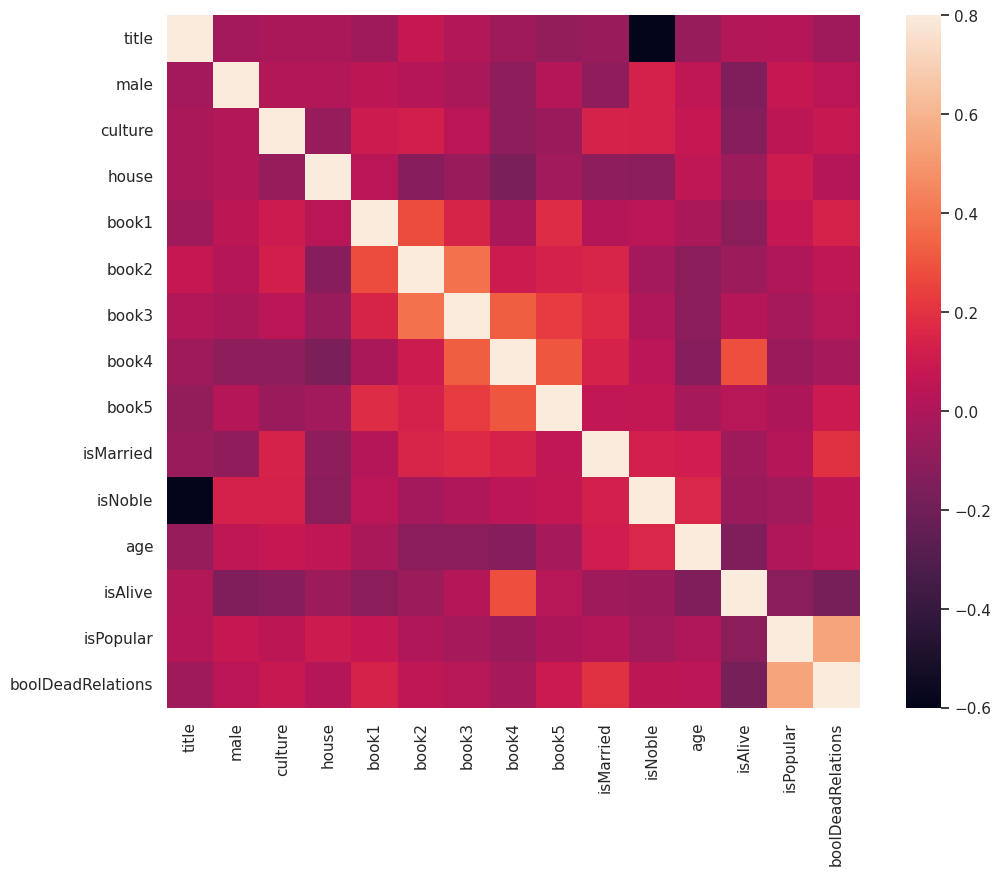

In [359]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

isAlive
1    1212
0     345
Name: count, dtype: int64


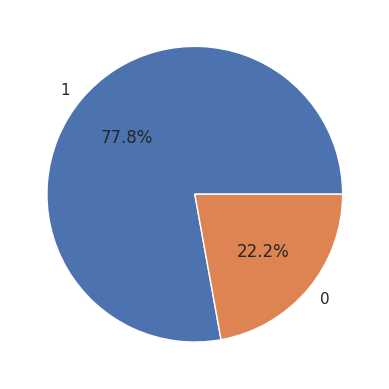

In [360]:
print(df['isAlive'].value_counts())
dt=df.isAlive.value_counts()
plt.pie(dt.values, labels=dt.index, autopct='%1.1f%%')
plt.show()

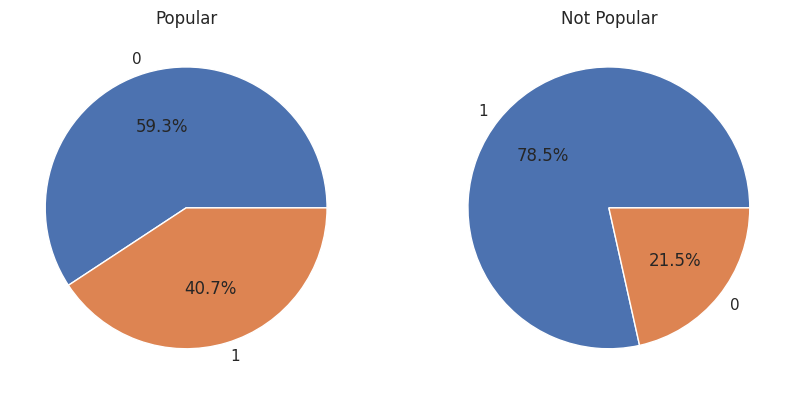

In [361]:
dt1=df.loc[(df.isPopular==1)]["isAlive"].value_counts()
dt2=df.loc[(df.isPopular==0)]["isAlive"].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(dt1.values, labels=dt1.index, autopct='%1.1f%%')
ax2.pie(dt2.values, labels=dt2.index, autopct='%1.1f%%')
ax1.set_title('Popular')
ax2.set_title('Not Popular')
plt.show()

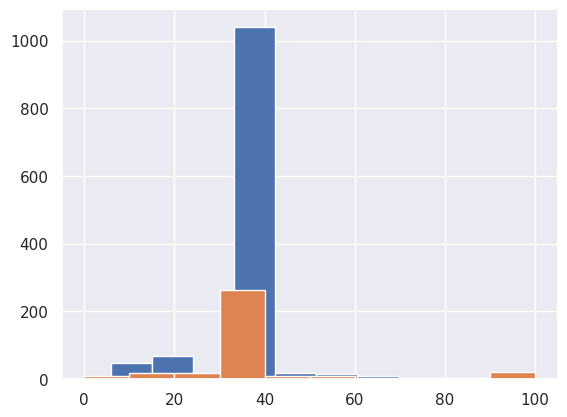

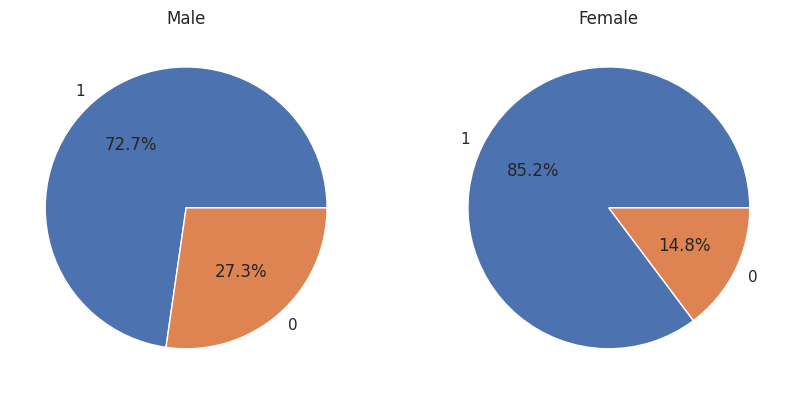

In [362]:
plt.hist(df[(df.isAlive==1)]["age"], label="Alive")
plt.hist(df[(df.isAlive==0)]["age"], label="Dead")
plt.show()

dt1=df.loc[(df.male==1)]["isAlive"].value_counts()
dt2=df.loc[(df.male==0)]["isAlive"].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(dt1.values, labels=dt1.index, autopct='%1.1f%%')
ax2.pie(dt2.values, labels=dt2.index, autopct='%1.1f%%')
ax1.set_title('Male')
ax2.set_title('Female')
plt.show()

**Задание 1.9.** Создайте переменные `X`,

---

которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [363]:
X = df.drop(columns=["isAlive"]).values
y = df["isAlive"].values

X_test_f = test_fin.values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [364]:
from sklearn.model_selection import train_test_split

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [366]:
# Масштабирование данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

X_test_fs = scaler.transform(X_test_f)


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [367]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [368]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [369]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [370]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


# Шаг 1. создание модели
# Здесь я перебирал knn руками до того, как нашел GridSearchCV
knn_classifier_3 = KNeighborsClassifier(n_neighbors=3)
knn_classifier_7 = KNeighborsClassifier(n_neighbors=7)
knn_classifier_11 = KNeighborsClassifier(n_neighbors=11)
knn_classifier_12 = KNeighborsClassifier(n_neighbors=12)
knn_classifier_13 = KNeighborsClassifier(n_neighbors=13)
knn_classifier_20 = KNeighborsClassifier(n_neighbors=20)
adaBooster = AdaBoostClassifier(n_estimators=100, random_state=0)
dec_tree_3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)
rand_b_class = RandomForestClassifier(n_estimators=100)
gauss_classifier = GaussianProcessClassifier()
gauss_nb = GaussianNB()
svc = SVC()


dec_tree = DecisionTreeClassifier()
param_grid = {
    'max_depth': np.arange(1, 10),
    'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid)
grid_search.fit(X_train_s, y_train)
grid_search.fit(X_train_s, y_train)


# Шаг 2. обучение модели
knn_classifier_3.fit(X_train_s, y_train)
knn_classifier_7.fit(X_train_s, y_train)
knn_classifier_11.fit(X_train_s, y_train)
knn_classifier_12.fit(X_train_s, y_train)
knn_classifier_13.fit(X_train_s, y_train)
knn_classifier_20.fit(X_train_s, y_train)
adaBooster.fit(X_train_s, y_train)
dec_tree.fit(X_train_s, y_train)
dec_tree_3.fit(X_train_s, y_train)
rand_b_class.fit(X_train_s, y_train)
gauss_classifier.fit(X_train_s, y_train)
gauss_nb.fit(X_train_s, y_train)
svc.fit(X_train_s, y_train)


SVC()

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [371]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [372]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7724


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [373]:
# Шаг 3. Предсказание на тестовых данных

y_pred_knn_3 = knn_classifier_3.predict(X_test_s)
y_pred_knn_7 = knn_classifier_7.predict(X_test_s)
y_pred_knn_11 = knn_classifier_11.predict(X_test_s)
y_pred_knn_12 = knn_classifier_12.predict(X_test_s)
y_pred_knn_13 = knn_classifier_13.predict(X_test_s)
y_pred_knn_20 = knn_classifier_20.predict(X_test_s)
y_pred_adaBooster = adaBooster.predict(X_test_s)
y_pred_dec_tree = dec_tree.predict(X_test_s)
y_pred_dec_tree_3 = dec_tree_3.predict(X_test_s)
y_pred_rand_b = rand_b_class.predict(X_test_s)
y_pred_gauss_ = gauss_classifier.predict(X_test_s)
y_pred_gauss_nb = gauss_nb.predict(X_test_s)
y_pred_svc = svc.predict(X_test_s)

# Шаг 4. Оценка предсказания по метрике accuracy
acc_knn_3 = accuracy_score(y_test, y_pred_knn_3)
acc_knn_7 = accuracy_score(y_test, y_pred_knn_7)
acc_knn_11 = accuracy_score(y_test, y_pred_knn_11)
acc_knn_12 = accuracy_score(y_test, y_pred_knn_12)
acc_knn_13 = accuracy_score(y_test, y_pred_knn_13)
acc_knn_20 = accuracy_score(y_test, y_pred_knn_20)
acc_adaBooster = accuracy_score(y_test, y_pred_adaBooster)
acc_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
acc_dec_tree_3 = accuracy_score(y_test, y_pred_dec_tree_3)
acc_rand_b = accuracy_score(y_test, y_pred_rand_b)
acc_gauss_ = accuracy_score(y_test, y_pred_gauss_)
acc_gauss_nb = accuracy_score(y_test, y_pred_gauss_nb)
acc_svc = accuracy_score(y_test, y_pred_svc)

print("Accuracy knn 3 : %.4f" % acc_knn_3)
print("Accuracy knn 7 : %.4f" % acc_knn_7)
print("Accuracy knn 11 : %.4f" % acc_knn_11)
print("Accuracy knn 12 : %.4f" % acc_knn_12)
print("Accuracy knn 13 : %.4f" % acc_knn_13)
print("Accuracy knn 20 : %.4f" % acc_knn_20)
print("Accuracy adaBooster : %.4f" % acc_adaBooster)
print("Accuracy dec_tree : %.4f" % acc_dec_tree)
print("Accuracy dec_tree_3 : %.4f" % acc_dec_tree_3)
print("Accuracy rand_b : %.4f" % acc_rand_b)
print("Accuracy gauss_ : %.4f" % acc_gauss_)
print("Accuracy gauss_nb : %.4f" % acc_gauss_nb)

Accuracy knn 3 : 0.7468
Accuracy knn 7 : 0.7821
Accuracy knn 11 : 0.7692
Accuracy knn 12 : 0.7756
Accuracy knn 13 : 0.7724
Accuracy knn 20 : 0.7788
Accuracy adaBooster : 0.7724
Accuracy dec_tree : 0.7500
Accuracy dec_tree_3 : 0.7564
Accuracy rand_b : 0.7885
Accuracy gauss_ : 0.7788
Accuracy gauss_nb : 0.7724


In [374]:
scores_knn_3 = cross_validate(knn_classifier_3, X, y, cv=5, return_train_score=True)
scores_knn_7 = cross_validate(knn_classifier_7, X, y, cv=5, return_train_score=True)
scores_knn_11 = cross_validate(knn_classifier_11, X, y, cv=5, return_train_score=True)
scores_knn_12 = cross_validate(knn_classifier_12, X, y, cv=5, return_train_score=True)
scores_knn_13 = cross_validate(knn_classifier_13, X, y, cv=5, return_train_score=True)
scores_knn_20 = cross_validate(knn_classifier_20, X, y, cv=5, return_train_score=True)
scores_adaBooster = cross_validate(adaBooster, X, y, cv=5, return_train_score=True)
scores_dec_tree = cross_validate(dec_tree, X, y, cv=5, return_train_score=True)
scores_dec_tree_3 = cross_validate(dec_tree_3, X, y, cv=5, return_train_score=True)
scores_rand_b = cross_validate(rand_b_class, X, y, cv=5, return_train_score=True)
scores_gauss_ = cross_validate(gauss_classifier, X, y, cv=5, return_train_score=True)
scores_gauss_nb = cross_validate(gauss_nb, X, y, cv=5, return_train_score=True)
scores_svc = cross_validate(svc, X, y, cv=5, return_train_score=True)

print(scores_knn_3["test_score"].mean(), 'knn 3')
print(scores_knn_7["test_score"].mean(), 'knn 7')
print(scores_knn_11["test_score"].mean(), 'knn 11')
print(scores_knn_12["test_score"].mean(), 'knn 12')
print(scores_knn_13["test_score"].mean(), 'knn 13')
print(scores_knn_20["test_score"].mean(), 'knn 20')
print(scores_adaBooster["test_score"].mean(), 'adaBooster')
print(scores_dec_tree["test_score"].mean(), 'dec_tree')
print(scores_dec_tree_3["test_score"].mean(), 'dec_tree_3')
print(scores_rand_b["test_score"].mean(), 'rand_b')
print(scores_gauss_["test_score"].mean(), 'gauss_')
print(scores_gauss_nb["test_score"].mean(), 'gauss_nb')
print(scores_svc["test_score"].mean(), 'svc')

0.7623258306538049 knn 3
0.7899497073130515 knn 7
0.7950923406711189 knn 11
0.7874020941545058 knn 12
0.7957374886635337 knn 13
0.7822738890263006 knn 20
0.7925302992827108 adaBooster
0.7308496166213209 dec_tree
0.7925426663368785 dec_tree_3
0.7822800725533845 rand_b
0.7494764613735675 gauss_
0.7854357325418418 gauss_nb
0.7784194904773682 svc


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [375]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.8MB/s]


In [385]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

y_pred_knn_11_f = knn_classifier_11.predict(X_test_fs)
y_pred_knn_12_f = knn_classifier_12.predict(X_test_fs)
y_pred_knn_13_f = knn_classifier_13.predict(X_test_fs)
rand_b_f = rand_b_class.predict(X_test_fs)
gauss_f = gauss_classifier.predict(X_test_fs)
dec_f = dec_tree_3.predict(X_test_fs)
ada_b_f = adaBooster.predict(X_test_fs)
svc_f = svc.predict(X_test_fs)

logistic_regression = LogisticRegression(C=1)
logistic_regression.fit(X_train_s, y_train)

y_pred_f = logistic_regression.predict(X_test_fs)

submission['isAlive'] = rand_b_f
submission.to_csv("/content/new_submission.csv", index=False)


In [380]:
submission['isAlive'] = svc_f

Как сохранить измененный Pandas DataFrame в csv файл:

In [381]:
submission.to_csv("/content/new_submission.csv", index=False)